In [1]:
# Librairies
import numpy as np
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt

path ="/home/gleprince/Documents/Certificat/Projet_2/starting_kit/sample_data"
data = pd.read_csv(path+"/store_train.data",sep=" ",names = ['ID', 'day', 'date', 'nb_customer','open','promo','state','school'])

In [2]:
data.head()

,ID,day,date,nb_customer,open,promo,state,school
0,874,4,2014-12-18,653,1,1,0,0
1,244,1,2013-08-19,448,1,0,0,1
2,222,2,2014-06-10,627,1,0,0,0
3,655,5,2013-04-05,545,1,0,0,1
4,806,4,2013-12-19,729,1,1,0,0


In [3]:
data.dtypes

ID              int64
day             int64
date           object
nb_customer     int64
open            int64
promo           int64
state          object
school          int64
dtype: object

In [4]:
data["date"]=pd.to_datetime(data["date"])
data["state"]=pd.Categorical(data["state"],ordered=False)

In [5]:
data.dtypes

ID                      int64
day                     int64
date           datetime64[ns]
nb_customer             int64
open                    int64
promo                   int64
state                category
school                  int64
dtype: object

In [6]:
data_extract=pd.get_dummies(data[["state"]])
extract= pd.get_dummies(data["day"],'day')
rest=data[["ID","date","nb_customer","open","promo","school"]]
ddata=pd.concat([extract,data_extract,rest],axis=1)
ddata.head()

,day_1,day_2,day_3,day_4,day_5,day_6,day_7,state_0,state_a,state_b,state_c,ID,date,nb_customer,open,promo,school
0,0,0,0,1,0,0,0,1,0,0,0,874,2014-12-18,653,1,1,0
1,1,0,0,0,0,0,0,1,0,0,0,244,2013-08-19,448,1,0,1
2,0,1,0,0,0,0,0,1,0,0,0,222,2014-06-10,627,1,0,0
3,0,0,0,0,1,0,0,1,0,0,0,655,2013-04-05,545,1,0,1
4,0,0,0,1,0,0,0,1,0,0,0,806,2013-12-19,729,1,1,0


In [7]:
ddata["state_0"]=pd.DataFrame(ddata["state_0"], dtype=int)
ddata["state_a"]=pd.DataFrame(ddata["state_a"], dtype=int)
ddata["state_b"]=pd.DataFrame(ddata["state_b"], dtype=int)
ddata["state_c"]=pd.DataFrame(ddata["state_c"], dtype=int)
ddata.dtypes
        

day_1                   uint8
day_2                   uint8
day_3                   uint8
day_4                   uint8
day_5                   uint8
day_6                   uint8
day_7                   uint8
state_0                 int64
state_a                 int64
state_b                 int64
state_c                 int64
ID                      int64
date           datetime64[ns]
nb_customer             int64
open                    int64
promo                   int64
school                  int64
dtype: object

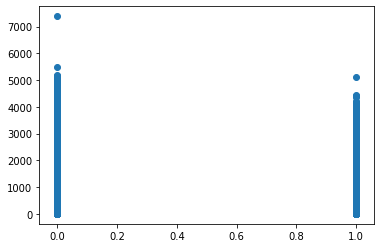

In [8]:
plt.scatter(ddata["day_3"],ddata["nb_customer"])
plt.show()

# ACP

In [68]:
# ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
X=scale(ddata[["nb_customer","day_6","day_7","open","state_0","school","promo"]])

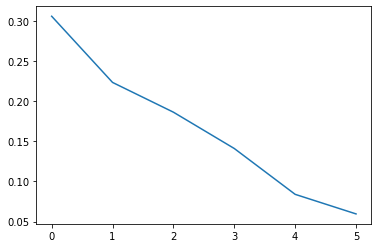

In [69]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [70]:
print(pca.explained_variance_ratio_)

[0.30590967 0.22340638 0.18630602 0.14102202 0.08387956 0.05947636]


In [47]:
pca.get_covariance()[1]

array([ 0.09354338,  0.84707248,  0.03082244,  0.02802479,  0.03443206,
        0.0383105 , -0.08148638,  0.08027071, -0.01995378,  0.00847033,
        0.02184891,  0.00761738,  0.0694084 ,  0.11639283])

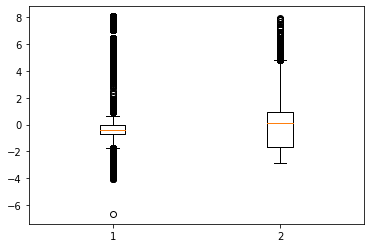

In [31]:
## distribution des composantes principales
plt.boxplot(C[:,0:20])
plt.show()

In [32]:
ex_variance=np.var(C,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio) 


[0.581749 0.418251]


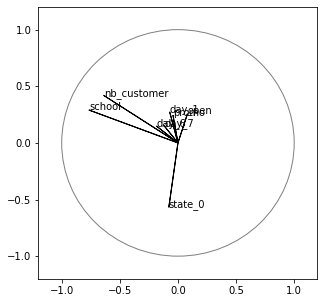

In [50]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, ddata[["nb_customer","day_1","day_6","day_7","open","promo","state_0","school"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

# APPRENTISSAGE -regression lineaire


In [99]:
# Variables explicatives sur les données train
data_extract=pd.get_dummies(data[["state"]])
extract= pd.get_dummies(data["day"],'day')
rest=data[["nb_customer","open","promo","school"]]
data_train2=pd.concat([extract,data_extract,rest],axis=1)

# choix des paramètres à prendre en compte
data_train = data_train2[["nb_customer","day_6","day_7","open","state_0","school","promo"]]
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712046 entries, 0 to 712045
Data columns (total 7 columns):
nb_customer    712046 non-null int64
day_6          712046 non-null uint8
day_7          712046 non-null uint8
open           712046 non-null int64
state_0        712046 non-null uint8
school         712046 non-null int64
promo          712046 non-null int64
dtypes: int64(4), uint8(3)
memory usage: 23.8 MB


In [100]:
#extraction données solution
cible = pd.read_csv(path+"/store_train.solution",sep=" ",names = ['sales'])

# variable à expliquer réelle
Yr_train=cible["sales"]
cible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712046 entries, 0 to 712045
Data columns (total 1 columns):
sales    712046 non-null int64
dtypes: int64(1)
memory usage: 5.4 MB


In [101]:
#extraction données test
ddata_test = pd.read_csv(path+"/store_test.data",sep=" ",names = ['ID', 'day', 'date', 'nb_customer','open','promo','state','school'])


ddat=pd.get_dummies(ddata_test[["state"]])
extract2= pd.get_dummies(ddata_test["day"],'day')
rest_5=ddata_test[["nb_customer","open","promo","school"]]
data_test2=pd.concat([extract2,ddat,rest_5],axis=1)

# choix des paramètres à prendre en compte
data_test = data_test2[["nb_customer","day_6","day_7","open","state_0","school","promo"]]
data_test.info()
      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203441 entries, 0 to 203440
Data columns (total 7 columns):
nb_customer    203441 non-null int64
day_6          203441 non-null uint8
day_7          203441 non-null uint8
open           203441 non-null int64
state_0        203441 non-null uint8
school         203441 non-null int64
promo          203441 non-null int64
dtypes: int64(4), uint8(3)
memory usage: 6.8 MB


In [102]:
from sklearn import linear_model
regLasso = linear_model.Lasso()
regLasso.fit(data_train,cible)
prevision=regLasso.predict(data_test)

In [103]:
print(len(prevision))

203441


In [104]:
#  mise en forme du FICHIER DE SORTIE pour l'UPLOAD
#

np.savetxt('/home/gleprince/kaggle-store-optimisation/output/scores.txt', prevision, fmt='%d')

In [105]:
prevision.max()-prevision.min()

23.554605594942586

## tentative d'entrainement supplémentaire en splittant



In [22]:
from sklearn.model_selection import train_test_split  

size_test = 300000 # taille de la partition de test
X_train,X_test,Yr_train,Yr_test=train_test_split(data_train,sol,test_size=size_test,random_state=11)

In [23]:
#NORMALISATION

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412046 entries, 443906 to 403353
Data columns (total 9 columns):
state_0        412046 non-null uint8
state_a        412046 non-null uint8
state_b        412046 non-null uint8
state_c        412046 non-null uint8
day            412046 non-null int64
nb_customer    412046 non-null int64
open           412046 non-null int64
promo          412046 non-null int64
school         412046 non-null int64
dtypes: int64(5), uint8(4)
memory usage: 20.4 MB


In [25]:
#RESHAPE pour bien spécifier nombre de ligne et de colonnes
Xr_train=Xr_train.reshape((len(data_train)-size_test,9))
Xr_test=Xr_test.reshape((size_test,9))

## regression linéaire


In [26]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
regLasso = linear_model.Lasso()
regLasso.fit(Xr_train,Yr_train)
prev=regLasso.predict(Xr_test)
print("MSE=",mean_squared_error(Yr_test,prev))

MSE= 14324840.22108701


In [27]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yr_test,prev))

R2= -2.4165760766470257e-05


In [28]:
model_lasso=regLasso.fit(X_train,Yr_train)
model_lasso.coef_

array([-0.        , -0.        ,  0.        ,  0.        ,  4.34184841,
        0.01675568, -0.        , -1.93367598, -4.28689196])

In [29]:
coef = pd.Series(model_lasso.coef_, index = data_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 4 variables et en supprime 5


Text(0.5, 1.0, 'Coefficients du modèle lasso')

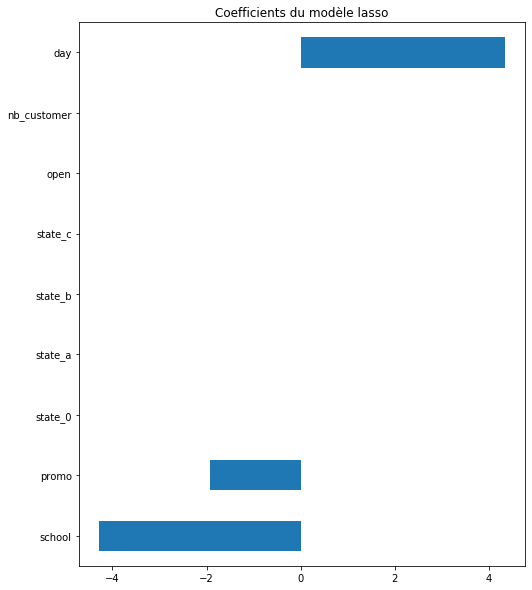

In [30]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")